<a href="https://colab.research.google.com/github/my3sheth/NM-Data-Science/blob/master/IMDb_Top_1%2C000_Movies_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***2 MODELS :***
### *1) Machine Learning: Regression Model*
### *2) Deep Learning: ANN (Artificial Neural Network) Model*

Below is the list of all the libraries required in this project.

In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
from math import sqrt
import datetime
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import r2_score

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, ReLU
from keras.layers import Dropout

In [2]:
data=pd.read_csv('/content/IMDB Movies copy.csv')

In [3]:
data.head()

,Title,Year_of_Release,Certificate,Runtime,Genre,Rating,Overview,Meta_Score,Director,Star_1,Star_2,Star_3,Star_4,Total_Votes,Revenue
0,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,UA,152,Action,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,A,202,Crime,9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,U,96,Crime,9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


# ***I. Machine Learning***

# *1. EDA (Exploratory Data Analysis)*

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            1000 non-null   object 
 1   Year_of_Release  1000 non-null   int64  
 2   Certificate      1000 non-null   object 
 3   Runtime          1000 non-null   int64  
 4   Genre            1000 non-null   object 
 5   Rating           1000 non-null   float64
 6   Overview         1000 non-null   object 
 7   Meta_Score       843 non-null    float64
 8   Director         1000 non-null   object 
 9   Star_1           1000 non-null   object 
 10  Star_2           1000 non-null   object 
 11  Star_3           1000 non-null   object 
 12  Star_4           1000 non-null   object 
 13  Total_Votes      1000 non-null   int64  
 14  Revenue          1000 non-null   int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 117.3+ KB


### ***Observation:***
There are no null columns. However, 'Meta_Score' seems to hold some null values.

In [5]:
data.duplicated().any()

False

### ***Observation:***
No duplicate values.

In [6]:
data.describe()

,Year_of_Release,Runtime,Rating,Meta_Score,Total_Votes,Revenue
count,1000.000000,1000.000000,1000.000000,843.000000,1.000000e+03,1.000000e+03
mean,1991.221000,122.891000,7.949300,77.971530,2.736929e+05,6.245165e+07
std,23.285669,28.093671,0.275491,12.376099,3.273727e+05,1.051148e+08
min,1920.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1976.000000,103.000000,7.700000,70.000000,5.552625e+04,2.351568e+06
50%,1999.000000,119.000000,7.900000,79.000000,1.385485e+05,1.791714e+07
75%,2009.000000,137.000000,8.100000,87.000000,3.741612e+05,7.410387e+07
max,2020.000000,321.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


In [7]:
data.corr()

,Year_of_Release,Runtime,Rating,Meta_Score,Total_Votes,Revenue
Year_of_Release,1.000000,0.165873,-0.131152,-0.339279,0.241779,0.237407
Runtime,0.165873,1.000000,0.243096,-0.031452,0.173264,0.126779
Rating,-0.131152,0.243096,1.000000,0.268531,0.494979,0.079927
Meta_Score,-0.339279,-0.031452,0.268531,1.000000,-0.018507,-0.036344
Total_Votes,0.241779,0.173264,0.494979,-0.018507,1.000000,0.559170
Revenue,0.237407,0.126779,0.079927,-0.036344,0.559170,1.000000


In [8]:
data.head()

,Title,Year_of_Release,Certificate,Runtime,Genre,Rating,Overview,Meta_Score,Director,Star_1,Star_2,Star_3,Star_4,Total_Votes,Revenue
0,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,UA,152,Action,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,A,202,Crime,9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,U,96,Crime,9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


# *2. Preprocessing*
### (i) Encoding - conversion of categorical values into numerical values.

In [9]:
today=datetime.date.today()
Age=today.year-data['Year_of_Release']
data.insert(1,"Age",Age)
data.drop('Year_of_Release', axis = 1, inplace = True)

encoder=LabelEncoder()
data.Certificate=encoder.fit_transform(data['Certificate'])
c_mapping=dict(zip(encoder.classes_,encoder.transform(encoder.classes_)))
c_values=pd.Series(c_mapping)
print('Certificate:-\n')
print(c_values)


data.Genre=encoder.fit_transform(data['Genre'])
g_mapping=dict(zip(encoder.classes_,encoder.transform(encoder.classes_)))
g_values=pd.Series(g_mapping)
print('\nGenre:-\n')
print(g_values)

Certificate:-

A            0
Approved     1
G            2
GP           3
PG           4
PG-13        5
Passed       6
R            7
TV-14        8
TV-MA        9
TV-PG       10
U           11
U/A         12
UA          13
Unrated     14
dtype: int64

Genre:-

Action        0
Adventure     1
Animation     2
Biography     3
Comedy        4
Crime         5
Drama         6
Family        7
Fantasy       8
Film-Noir     9
Horror       10
Mystery      11
Thriller     12
Western      13
dtype: int64


In [10]:
data.head()

,Title,Age,Certificate,Runtime,Genre,Rating,Overview,Meta_Score,Director,Star_1,Star_2,Star_3,Star_4,Total_Votes,Revenue
0,The Shawshank Redemption,29,0,142,6,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,51,0,175,5,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,15,13,152,0,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,49,0,202,5,9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,66,11,96,5,9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


### (ii) Imputation - detecting and handling missing/null values.

In [11]:
data.isnull().sum()

Title            0
Age              0
Certificate      0
Runtime          0
Genre            0
Rating           0
Overview         0
Meta_Score     157
Director         0
Star_1           0
Star_2           0
Star_3           0
Star_4           0
Total_Votes      0
Revenue          0
dtype: int64

In [12]:
null=data[data['Meta_Score'].isnull()]

In [13]:
null.head()

,Title,Age,Certificate,Runtime,Genre,Rating,Overview,Meta_Score,Director,Star_1,Star_2,Star_3,Star_4,Total_Votes,Revenue
20,Soorarai Pottru,3,11,153,6,8.6,"Nedumaaran Rajangam ""Maara"" sets out to make t...",NaN,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,12763
54,Ayla: The Daughter of War,6,0,125,3,8.4,"In 1950, amid-st the ravages of the Korean War...",NaN,Can Ulkay,Erdem Can,Çetin Tekindor,Ismail Hacioglu,Kyung-jin Lee,34112,19381
55,Vikram Vedha,6,13,147,0,8.4,"Vikram, a no-nonsense police officer, accompan...",NaN,Gayatri,Pushkar,Madhavan,Vijay Sethupathi,Shraddha Srinath,28401,1661296
57,Dangal,7,11,161,0,8.4,Former wrestler Mahavir Singh Phogat and his t...,NaN,Nitesh Tiwari,Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh,Sanya Malhotra,156479,12391761
65,Taare Zameen Par,16,11,165,6,8.4,An eight-year-old boy is thought to be a lazy ...,NaN,Aamir Khan,Amole Gupte,Darsheel Safary,Aamir Khan,Tisca Chopra,168895,1223869


In [14]:
imputer=SimpleImputer(strategy='median')
data[['Meta_Score']]=imputer.fit_transform(data[['Meta_Score']]).round(1)

In [15]:
data.iloc[null.index]

,Title,Age,Certificate,Runtime,Genre,Rating,Overview,Meta_Score,Director,Star_1,Star_2,Star_3,Star_4,Total_Votes,Revenue
20,Soorarai Pottru,3,11,153,6,8.6,"Nedumaaran Rajangam ""Maara"" sets out to make t...",79.0,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,12763
54,Ayla: The Daughter of War,6,0,125,3,8.4,"In 1950, amid-st the ravages of the Korean War...",79.0,Can Ulkay,Erdem Can,Çetin Tekindor,Ismail Hacioglu,Kyung-jin Lee,34112,19381
55,Vikram Vedha,6,13,147,0,8.4,"Vikram, a no-nonsense police officer, accompan...",79.0,Gayatri,Pushkar,Madhavan,Vijay Sethupathi,Shraddha Srinath,28401,1661296
57,Dangal,7,11,161,0,8.4,Former wrestler Mahavir Singh Phogat and his t...,79.0,Nitesh Tiwari,Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh,Sanya Malhotra,156479,12391761
65,Taare Zameen Par,16,11,165,6,8.4,An eight-year-old boy is thought to be a lazy ...,79.0,Aamir Khan,Amole Gupte,Darsheel Safary,Aamir Khan,Tisca Chopra,168895,1223869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,The Day the Earth Stood Still,72,11,92,6,7.7,An alien lands and tells the people of Earth t...,79.0,Robert Wise,Michael Rennie,Patricia Neal,Hugh Marlowe,Sam Jaffe,76315,53309
874,Gilda,77,1,110,6,7.7,A small-time gambler hired to work in a Buenos...,79.0,Charles Vidor,Rita Hayworth,Glenn Ford,George Macready,Joseph Calleia,27991,53509
899,El cuerpo,11,0,112,11,7.6,A detective searches for the body of a femme f...,79.0,Oriol Paulo,Jose Coronado,Hugo Silva,Belén Rueda,Aura Garrido,57549,37707919
909,Celda 211,14,13,113,0,7.6,The story of two men on different sides of a p...,79.0,Daniel Monzón,Luis Tosar,Alberto Ammann,Antonio Resines,Manuel Morón,63882,35014392


In [16]:
data.isnull().sum()

Title          0
Age            0
Certificate    0
Runtime        0
Genre          0
Rating         0
Overview       0
Meta_Score     0
Director       0
Star_1         0
Star_2         0
Star_3         0
Star_4         0
Total_Votes    0
Revenue        0
dtype: int64

Classifying categorical and numerical columns:

In [17]:
data[['Rating','Meta_Score']]=data[['Rating','Meta_Score']].astype(int)
numerical=data.select_dtypes(np.int64,np.float64)
categorical=data.select_dtypes(np.object)
print(numerical.columns,'\n')
print(categorical.columns)

Index(['Age', 'Certificate', 'Runtime', 'Genre', 'Rating', 'Meta_Score',
       'Total_Votes', 'Revenue'],
      dtype='object') 

Index(['Title', 'Overview', 'Director', 'Star_1', 'Star_2', 'Star_3',
       'Star_4'],
      dtype='object')


In [18]:
data.head()

,Title,Age,Certificate,Runtime,Genre,Rating,Overview,Meta_Score,Director,Star_1,Star_2,Star_3,Star_4,Total_Votes,Revenue
0,The Shawshank Redemption,29,0,142,6,9,Two imprisoned men bond over a number of years...,80,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,51,0,175,5,9,An organized crime dynasty's aging patriarch t...,100,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,15,13,152,0,9,When the menace known as the Joker wreaks havo...,84,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,49,0,202,5,9,The early life and career of Vito Corleone in ...,90,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,66,11,96,5,9,A jury holdout attempts to prevent a miscarria...,96,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


In [19]:
for i in numerical.columns:
  print(numerical[i].value_counts().head(),'\n')

9     32
19    31
14    29
10    28
7     28
Name: Age, dtype: int64 

0     246
11    238
13    227
7     147
5      43
Name: Certificate, dtype: int64 

100    23
130    23
129    22
101    22
113    22
Name: Runtime, dtype: int64 

6    289
0    172
4    155
5    107
3     88
Name: Genre, dtype: int64 

7    537
8    458
9      5
Name: Rating, dtype: int64 

79    180
76     32
84     29
90     29
80     27
Name: Meta_Score, dtype: int64 

65341      2
2343110    1
184740     1
215034     1
126871     1
Name: Total_Votes, dtype: int64 

4360000     5
4360200     3
5321508     2
25000000    2
9600000     2
Name: Revenue, dtype: int64 



### ***Observation:***
The above data displays the count of column-wise top 5 values.

### (iii) Outlier detection and handling

Age


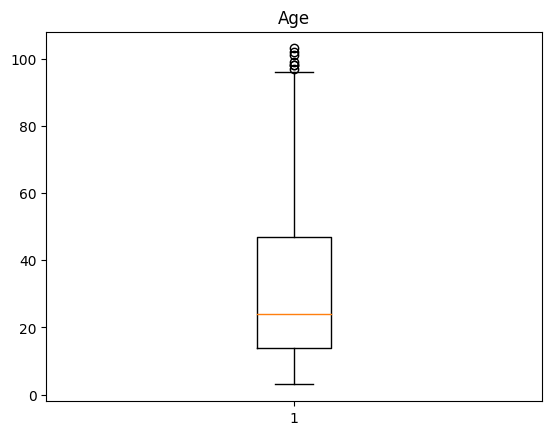

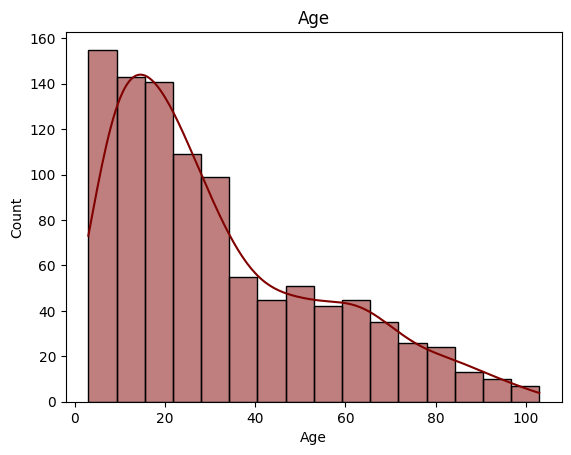






Certificate


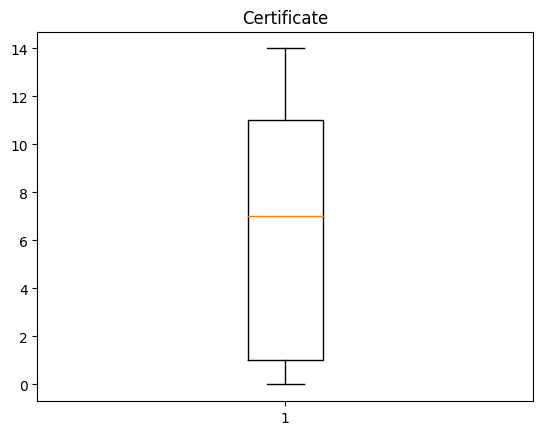

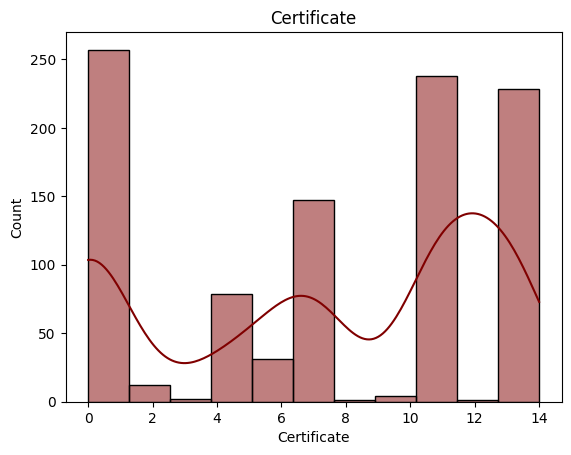






Runtime


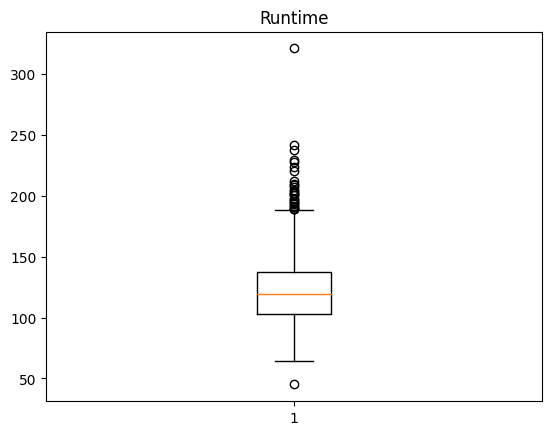

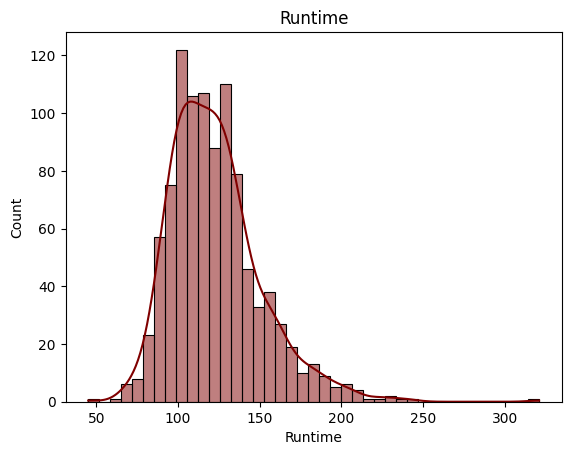






Genre


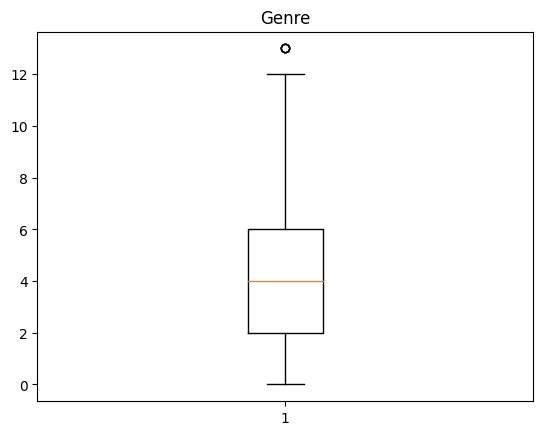

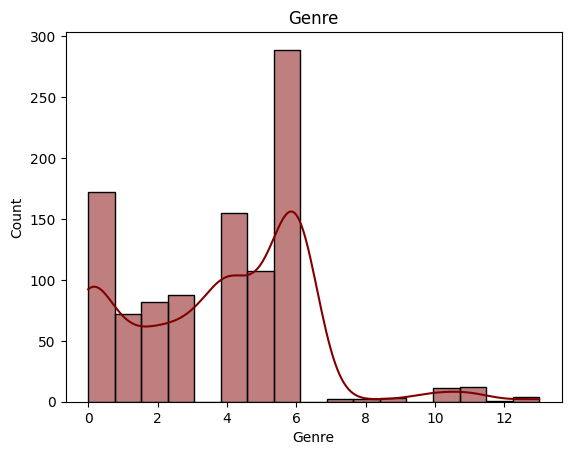






Rating


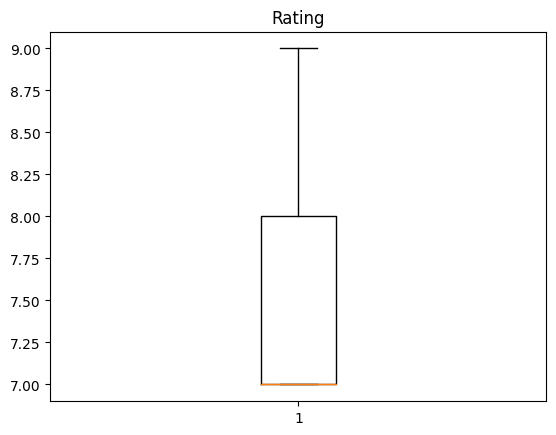

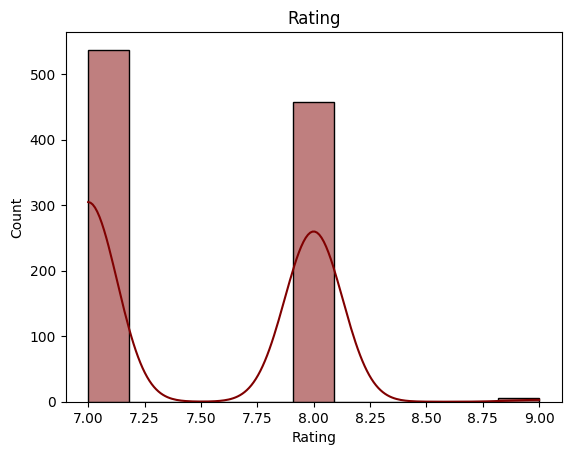






Meta_Score


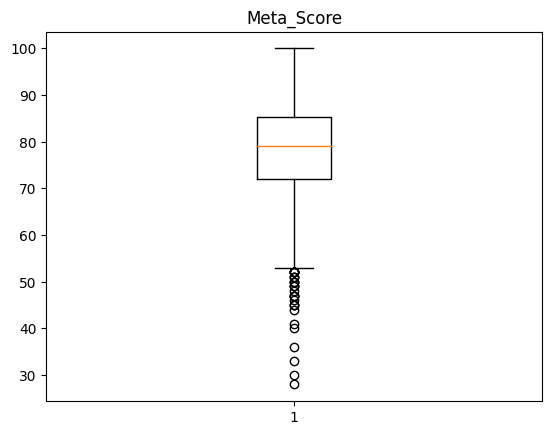

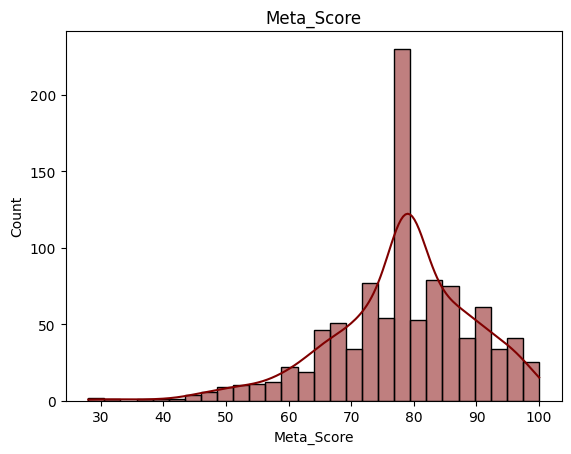






Total_Votes


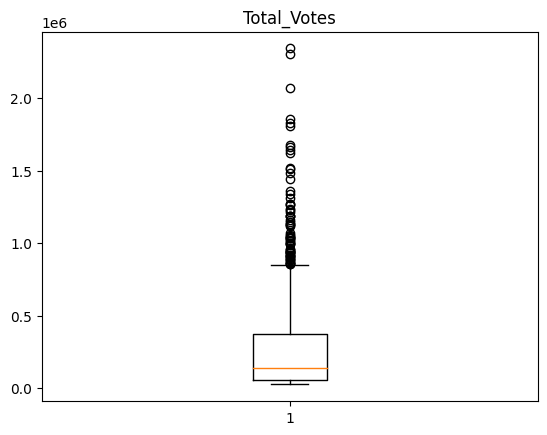

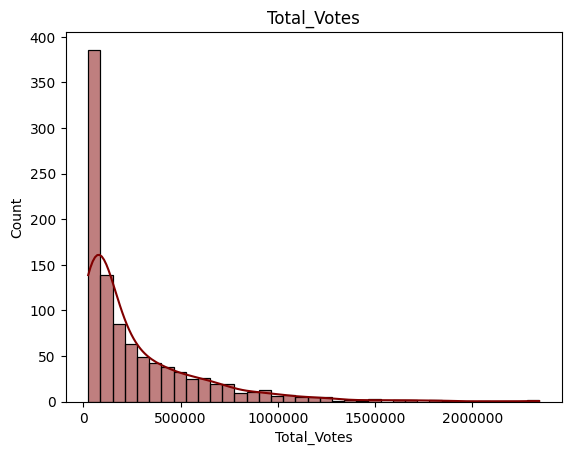






Revenue


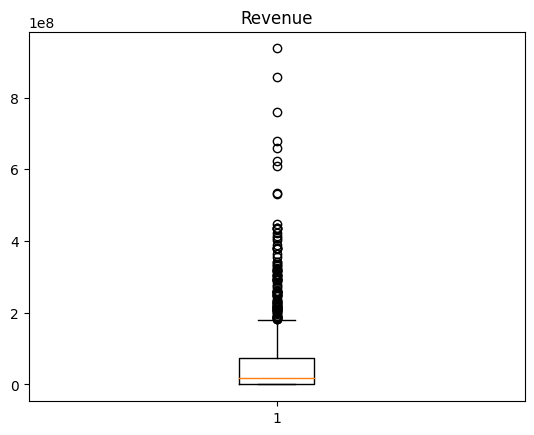

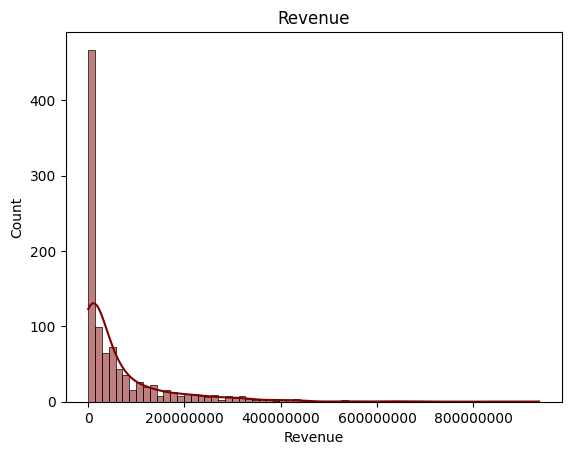

In [20]:
for i in numerical:
  plt.boxplot(numerical[i])
  plt.title(i)
  print(i)
  plt.show()
  print("\n\n")
  sns.histplot(numerical[i],kde=True,color='Maroon')
  plt.ticklabel_format(style='plain')
  plt.title(i)
  plt.show()
  print("\n\n\n\n")

### ***Observation:***
All above columns except for 'Certificate' and 'Rating' contain outliers.

In [21]:
numerical.columns

Index(['Age', 'Certificate', 'Runtime', 'Genre', 'Rating', 'Meta_Score',
       'Total_Votes', 'Revenue'],
      dtype='object')

-35.5
96.5


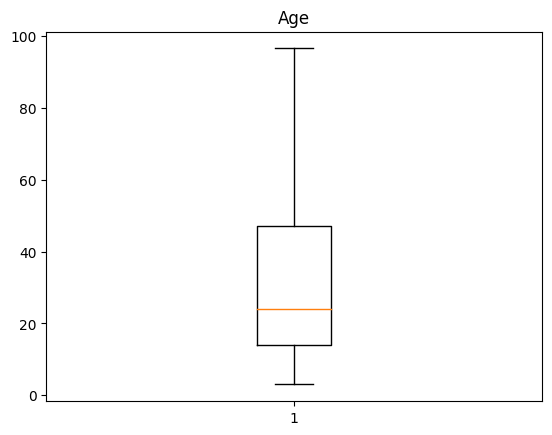

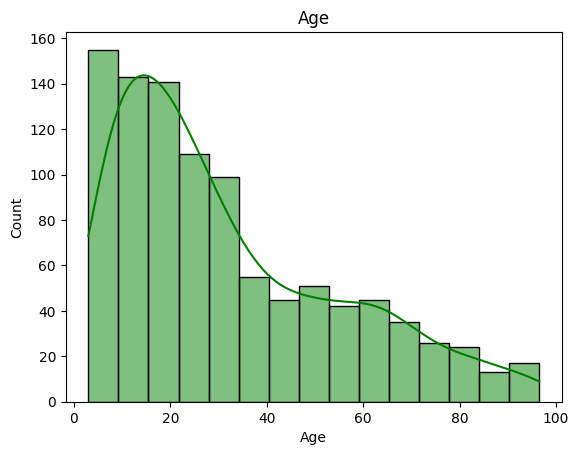

In [22]:
age=data.Age
q1=age.quantile(0.25)
q3=age.quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr

age[(age<lower)|(age>upper)]

print(lower)
print(upper)

data.Age[data.Age<lower]=lower
data.Age[data.Age>upper]=upper

#Verifying if the outliers have been handled rightly
plt.boxplot(data['Age'])
plt.title('Age')
plt.show()
print('\n\n')
sns.histplot(data['Age'],kde=True,color='Green')
plt.title('Age')
plt.xlabel('Age')
plt.show()

52.0
188.0


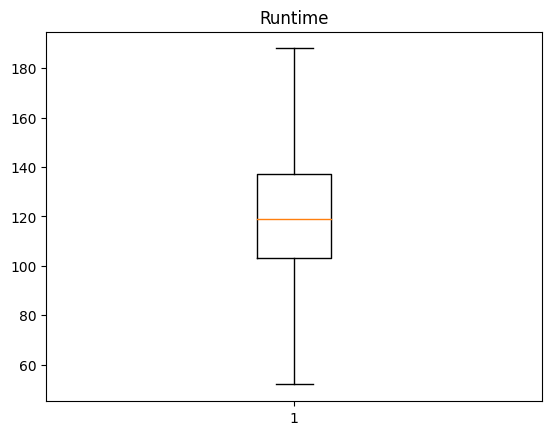

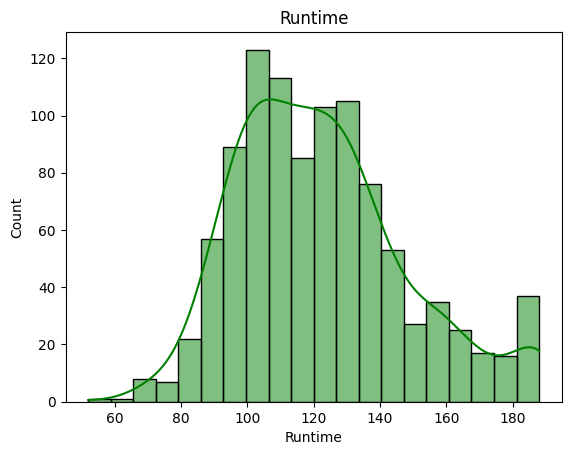

In [23]:
runtime=data.Runtime
q1=runtime.quantile(0.25)
q3=runtime.quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr

runtime[(runtime<lower)|(runtime>upper)]

print(lower)
print(upper)

data.Runtime[data.Runtime<lower]=lower
data.Runtime[data.Runtime>upper]=upper

#Verifying if the outliers have been handled rightly
plt.boxplot(data['Runtime'])
plt.title('Runtime')
plt.show()
print('\n\n')
sns.histplot(data['Runtime'],kde=True,color='Green')
plt.title('Runtime')
plt.xlabel('Runtime')
plt.show()

-4.0
12.0


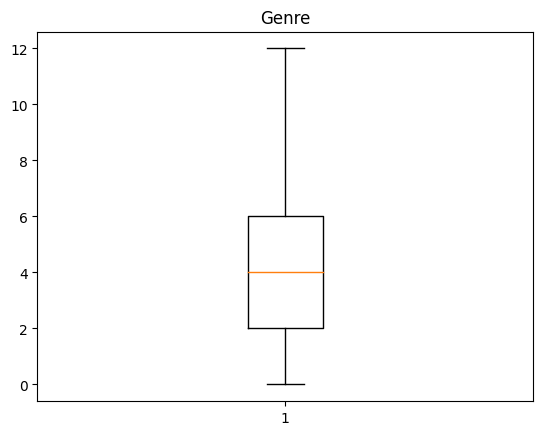

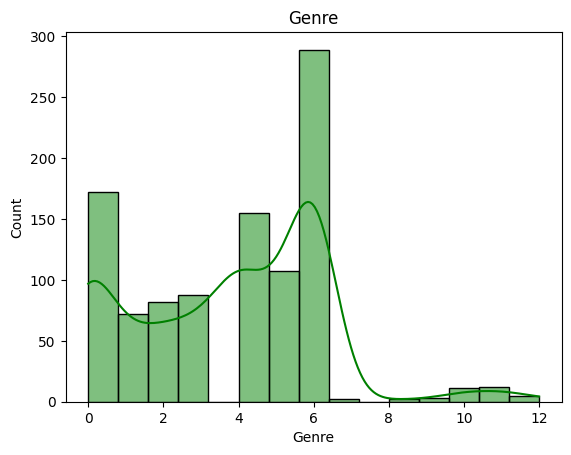

In [24]:
genre=data.Genre
q1=genre.quantile(0.25)
q3=genre.quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr

genre[(genre<lower)|(genre>upper)]

print(lower)
print(upper)

data.Genre[data.Genre<lower]=lower
data.Genre[data.Genre>upper]=upper

#Verifying if the outliers have been handled rightly
plt.boxplot(data['Genre'])
plt.title('Genre')
plt.show()
print('\n\n')
sns.histplot(data['Genre'],kde=True,color='Green')
plt.title('Genre')
plt.xlabel('Genre')
plt.show()

52.125
105.125


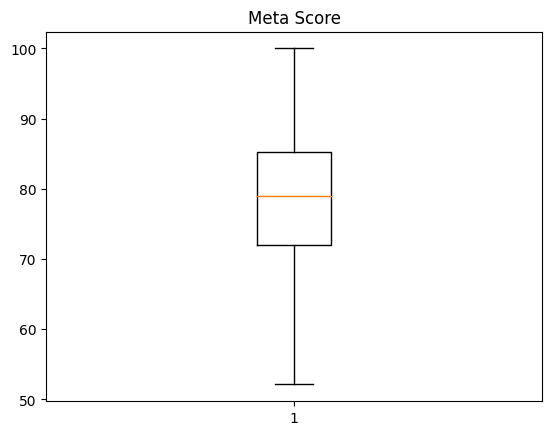

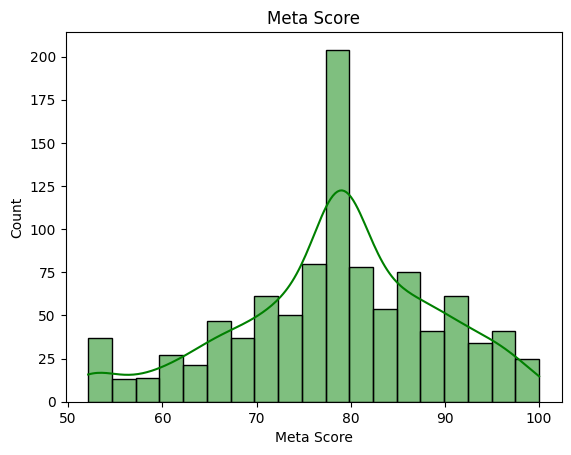

In [25]:
ms=data.Meta_Score
q1=ms.quantile(0.25)
q3=ms.quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr

ms[(ms<lower)|(ms>upper)]

print(lower)
print(upper)

data.Meta_Score[data.Meta_Score<lower]=lower
data.Meta_Score[data.Meta_Score>upper]=upper

#Verifying if the outliers have been handled rightly
plt.boxplot(data['Meta_Score'])
plt.title('Meta Score')
plt.show()
print('\n\n')
sns.histplot(data['Meta_Score'],kde=True,color='Green')
plt.title('Meta Score')
plt.xlabel('Meta Score')
plt.show()

-422426.25
852113.75


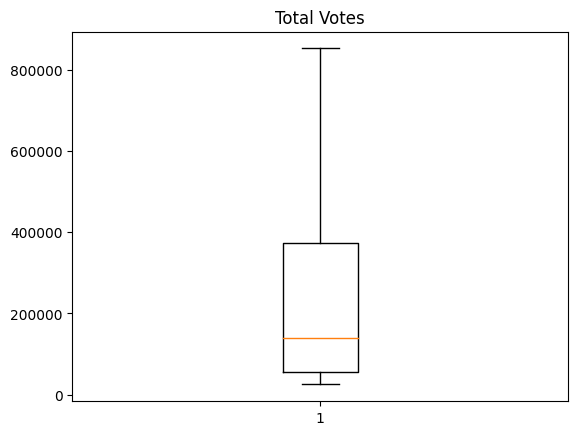

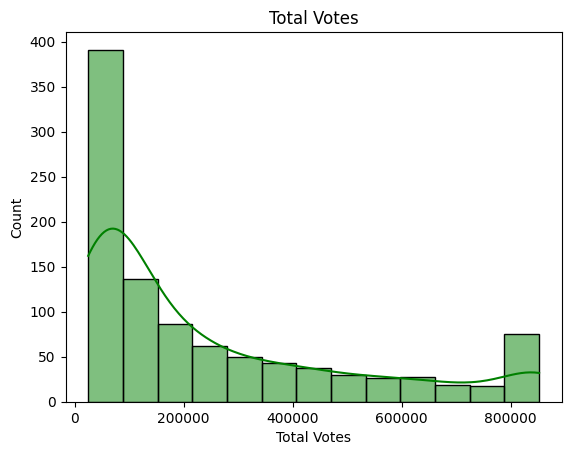

In [26]:
votes=data.Total_Votes
q1=votes.quantile(0.25)
q3=votes.quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr

votes[(votes<lower)|(votes>upper)]

print(lower)
print(upper)

data.Total_Votes[data.Total_Votes<lower]=lower
data.Total_Votes[data.Total_Votes>upper]=upper

#Verifying if the outliers have been handled rightly
plt.ticklabel_format(style='plain')
plt.boxplot(data['Total_Votes'])
plt.title('Total Votes')
plt.show()
print('\n\n')
sns.histplot(data['Total_Votes'],kde=True,color='Green')
plt.ticklabel_format(style='plain')
plt.title('Total Votes')
plt.xlabel('Total Votes')
plt.show()

-105276885.0
181732323.0


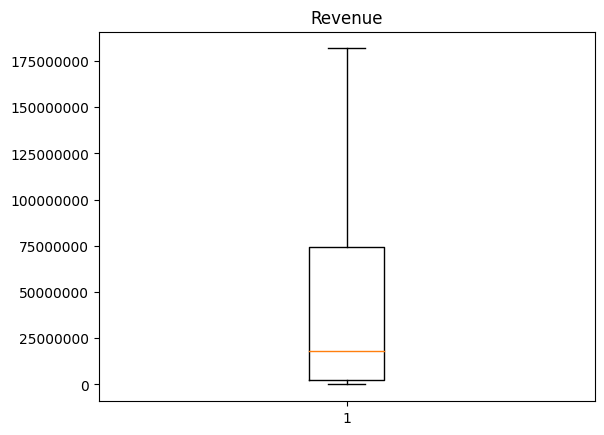

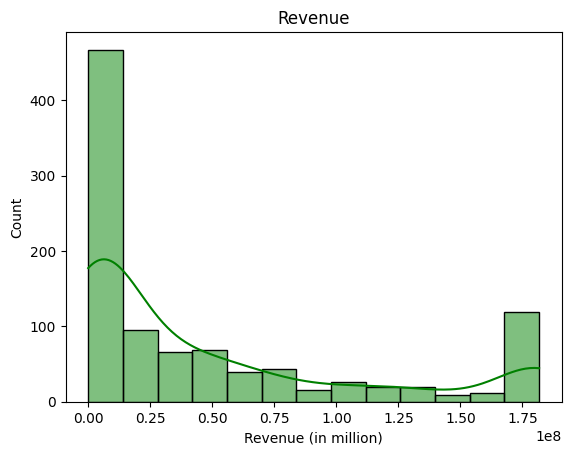

In [27]:
revenue=data.Revenue
q1=revenue.quantile(0.25)
q3=revenue.quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr

revenue[(revenue<lower)|(revenue>upper)]

print(lower)
print(upper)

data.Revenue[data.Revenue<lower]=lower
data.Revenue[data.Revenue>upper]=upper

#Verifying if the outliers have been handled rightly
plt.ticklabel_format(style='plain')
plt.boxplot(data['Revenue'])
plt.title('Revenue')
plt.show()
print('\n\n')
sns.histplot(data['Revenue'],kde=True,color='Green')
plt.title('Revenue')
plt.xlabel('Revenue (in million)')
plt.show()

In [28]:
data.head()

,Title,Age,Certificate,Runtime,Genre,Rating,Overview,Meta_Score,Director,Star_1,Star_2,Star_3,Star_4,Total_Votes,Revenue
0,The Shawshank Redemption,29.0,0,142,6,9,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,852113.75,28341469
1,The Godfather,51.0,0,175,5,9,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,852113.75,134966411
2,The Dark Knight,15.0,13,152,0,9,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,852113.75,181732323
3,The Godfather: Part II,49.0,0,188,5,9,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,852113.75,57300000
4,12 Angry Men,66.0,11,96,5,9,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845.00,4360000


In [29]:
for i in numerical.columns:
  data[i]=data[i].astype(int)
for j in data['Meta_Score']:
  j=data['Meta_Score'].astype(int)

In [30]:
data.head()

,Title,Age,Certificate,Runtime,Genre,Rating,Overview,Meta_Score,Director,Star_1,Star_2,Star_3,Star_4,Total_Votes,Revenue
0,The Shawshank Redemption,29,0,142,6,9,Two imprisoned men bond over a number of years...,80,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,852113,28341469
1,The Godfather,51,0,175,5,9,An organized crime dynasty's aging patriarch t...,100,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,852113,134966411
2,The Dark Knight,15,13,152,0,9,When the menace known as the Joker wreaks havo...,84,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,852113,181732323
3,The Godfather: Part II,49,0,188,5,9,The early life and career of Vito Corleone in ...,90,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,852113,57300000
4,12 Angry Men,66,11,96,5,9,A jury holdout attempts to prevent a miscarria...,96,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


Now, let's visualize the preprocessed data to get quick and clear insights on each variable.

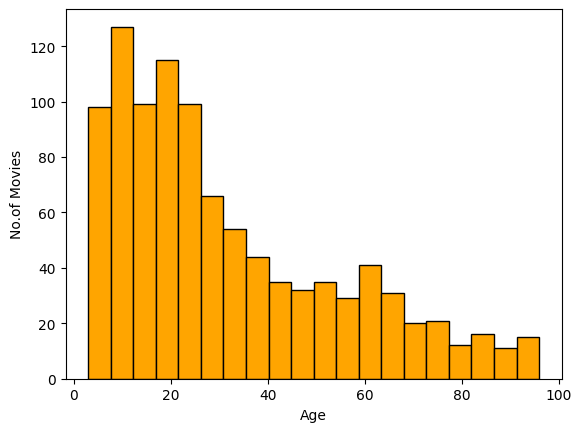

In [31]:
plt.hist(data.Age,edgecolor='black',bins=20,color='orange')
plt.xlabel('Age')
plt.ylabel('No.of Movies')
plt.show()

###***Observation:***
#####Almost 130/1000 top movies are about a decade old. Below is the list of rows of a decade old movies.

In [32]:
data[data['Age']==10]

,Title,Age,Certificate,Runtime,Genre,Rating,Overview,Meta_Score,Director,Star_1,Star_2,Star_3,Star_4,Total_Votes,Revenue
87,Drishyam,10,11,160,5,8,A man goes to extreme lengths to save his fami...,79,Jeethu Joseph,Mohanlal,Meena,Asha Sharath,Ansiba,30722,288875
137,Queen,10,13,146,1,8,A Delhi girl from a traditional family sets ou...,79,Vikas Bahl,Kangana Ranaut,Rajkummar Rao,Lisa Haydon,Jeffrey Ho,60701,1429534
138,Mandariinid,10,0,87,6,8,"In 1992, war rages in Abkhazia, a breakaway re...",73,Zaza Urushadze,Lembit Ulfsak,Elmo Nüganen,Giorgi Nakashidze,Misha Meskhi,40382,144501
139,Bhaag Milkha Bhaag,10,11,186,3,8,The truth behind the ascension of Milkha Singh...,79,Rakeysh Omprakash Mehra,Farhan Akhtar,Sonam Kapoor,Pawan Malhotra,Art Malik,61137,1626289
147,The Wolf of Wall Street,10,0,180,3,8,"Based on the true story of Jordan Belfort, fro...",75,Martin Scorsese,Leonardo DiCaprio,Jonah Hill,Margot Robbie,Matthew McConaughey,852113,116900694
215,12 Years a Slave,10,0,134,3,8,"In the antebellum United States, Solomon North...",96,Steve McQueen,Chiwetel Ejiofor,Michael Kenneth Williams,Michael Fassbender,Brad Pitt,640533,56671993
216,Rush,10,13,123,0,8,The merciless 1970s rivalry between Formula On...,74,Ron Howard,Daniel Brühl,Chris Hemsworth,Olivia Wilde,Alexandra Maria Lara,432811,26947624
222,Prisoners,10,0,153,5,8,When Keller Dover's daughter and her friend go...,70,Denis Villeneuve,Hugh Jackman,Jake Gyllenhaal,Viola Davis,Melissa Leo,601149,61002302
332,Kaguyahime no monogatari,10,11,137,2,8,Found inside a shining stalk of bamboo by an o...,89,Isao Takahata,Chloë Grace Moretz,James Caan,Mary Steenburgen,James Marsden,38746,1506975
335,Special Chabbis,10,13,144,5,8,A gang of con-men rob proent rich businessmen ...,79,Neeraj Pandey,Akshay Kumar,Anupam Kher,Manoj Bajpayee,Jimmy Sheirgill,51069,1079369


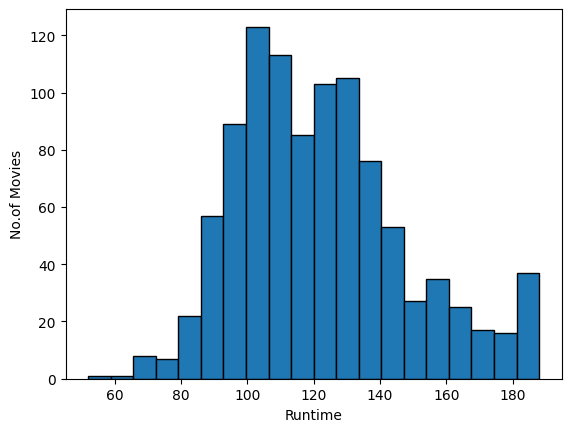

In [33]:
plt.hist(data.Runtime,edgecolor='black',bins=20)
plt.xlabel('Runtime')
plt.ylabel('No.of Movies')
plt.show()

###***Observation:***
#####Almost 130/1000 top movies have a duration of about 105 minutes. Below is the list of rows with a duration between 100 and 115.

In [34]:
data[(data['Runtime']>=100) & (data['Runtime']<=115)]

,Title,Age,Certificate,Runtime,Genre,Rating,Overview,Meta_Score,Director,Star_1,Star_2,Star_3,Star_4,Total_Votes,Revenue
34,Whiplash,9,0,106,6,8,A promising young drummer enrolls at a cut-thr...,88,Damien Chazelle,Miles Teller,J.K. Simmons,Melissa Benoist,Paul Reiser,717585,13092000
35,The Intouchables,12,13,112,3,8,After he becomes a quadriplegic from a paragli...,57,Olivier Nakache,Éric Toledano,François Cluzet,Omar Sy,Anne Le Ny,760360,13182281
41,The Usual Suspects,28,0,106,5,8,A sole survivor tells of the twisty events lea...,77,Bryan Singer,Kevin Spacey,Gabriel Byrne,Chazz Palteri,Stephen Baldwin,852113,23341568
42,Léon,29,0,110,0,8,"Mathilda, a 12-year-old girl, is reluctantly t...",64,Luc Besson,Jean Reno,Gary Oldman,Natalie Portman,Danny Aiello,852113,19501238
49,Psycho,63,0,109,10,8,"A Phoenix secretary embezzles $40,000 from her...",97,Alfred Hitchcock,Anthony Perkins,Janet Leigh,Vera Miles,John Gavin,604211,32000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,On Golden Pond,42,13,109,6,7,Norman is a curmudgeon with an estranged relat...,68,Mark Rydell,Katharine Hepburn,Henry Fonda,Jane Fonda,Doug McKeon,27650,119285432
985,Escape from Alcatraz,44,0,112,0,7,Alcatraz is the most secure prison of its time...,76,Don Siegel,Clint Eastwood,Patrick McGoohan,Roberts Blossom,Jack Thibeau,121731,43000000
989,The Long Goodbye,50,0,112,4,7,Private investigator Philip Marlowe helps a fr...,87,Robert Altman,Elliott Gould,Nina van Pallandt,Sterling Hayden,Mark Rydell,26337,959000
993,Blowup,57,0,111,6,7,A fashion photographer unknowingly captures a ...,82,Michelangelo Antonioni,David Hemgs,Vanessa Redgrave,Sarah Miles,John Castle,56513,1378635


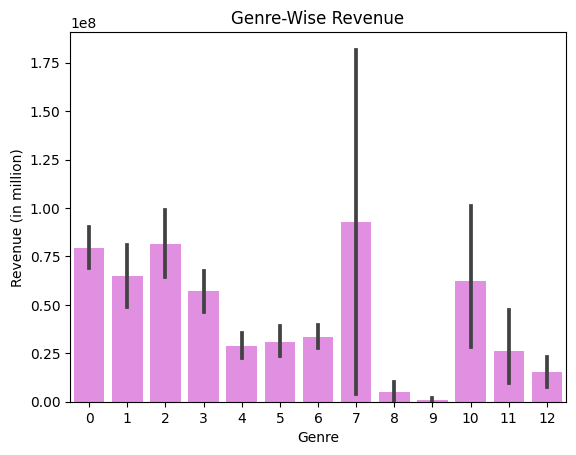

Action        0
Adventure     1
Animation     2
Biography     3
Comedy        4
Crime         5
Drama         6
Family        7
Fantasy       8
Film-Noir     9
Horror       10
Mystery      11
Thriller     12
Western      13
dtype: int64


In [35]:
sns.barplot(x=data.Genre,y=data.Revenue,color='Violet')
plt.xlabel('Genre')
plt.ylabel('Revenue (in million)')
plt.title('Genre-Wise Revenue')
plt.show()
print(g_values)

###***Observation:***
##### Top 5 genres earning the highest revenue are: Family, Animation, Action, Horror and Biography.

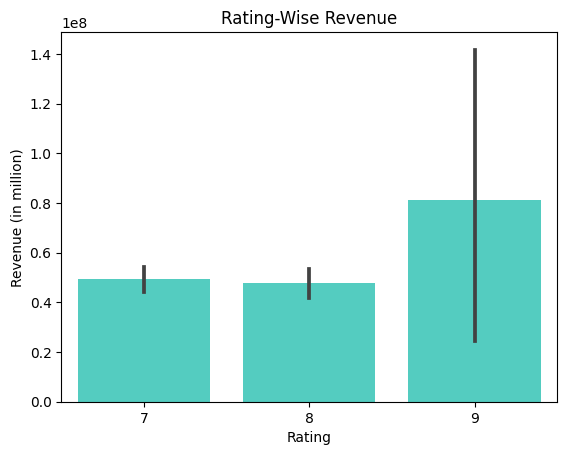

In [36]:
sns.barplot(x=data.Rating,y=data.Revenue,color='Turquoise')
plt.xlabel('Rating')
plt.ylabel('Revenue (in million)')
plt.title('Rating-Wise Revenue')
plt.show()

####***Observation:***
#####Naturally, the top-rated movies earn the highest revenue.

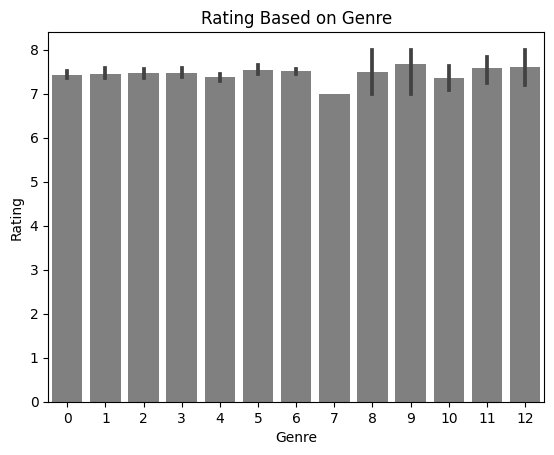

Action        0
Adventure     1
Animation     2
Biography     3
Comedy        4
Crime         5
Drama         6
Family        7
Fantasy       8
Film-Noir     9
Horror       10
Mystery      11
Thriller     12
Western      13
dtype: int64


In [37]:
sns.barplot(x=data.Genre,y=data.Rating,color='Gray')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.title('Rating Based on Genre')
plt.show()
print(g_values)

####***Observation:***
#####All genres have a positive rating.

In [38]:
data.head()

,Title,Age,Certificate,Runtime,Genre,Rating,Overview,Meta_Score,Director,Star_1,Star_2,Star_3,Star_4,Total_Votes,Revenue
0,The Shawshank Redemption,29,0,142,6,9,Two imprisoned men bond over a number of years...,80,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,852113,28341469
1,The Godfather,51,0,175,5,9,An organized crime dynasty's aging patriarch t...,100,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,852113,134966411
2,The Dark Knight,15,13,152,0,9,When the menace known as the Joker wreaks havo...,84,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,852113,181732323
3,The Godfather: Part II,49,0,188,5,9,The early life and career of Vito Corleone in ...,90,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,852113,57300000
4,12 Angry Men,66,11,96,5,9,A jury holdout attempts to prevent a miscarria...,96,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


Now that we've got some insights, let's proceed and build a predictive model.
# *3. Training and Testing*

In [39]:
data.head()

,Title,Age,Certificate,Runtime,Genre,Rating,Overview,Meta_Score,Director,Star_1,Star_2,Star_3,Star_4,Total_Votes,Revenue
0,The Shawshank Redemption,29,0,142,6,9,Two imprisoned men bond over a number of years...,80,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,852113,28341469
1,The Godfather,51,0,175,5,9,An organized crime dynasty's aging patriarch t...,100,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,852113,134966411
2,The Dark Knight,15,13,152,0,9,When the menace known as the Joker wreaks havo...,84,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,852113,181732323
3,The Godfather: Part II,49,0,188,5,9,The early life and career of Vito Corleone in ...,90,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,852113,57300000
4,12 Angry Men,66,11,96,5,9,A jury holdout attempts to prevent a miscarria...,96,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


### ***Observation:***
'Revenue' is considered as the final output column.

First, we will scale our values.

In [40]:
scaler1=MinMaxScaler()
scaler2=StandardScaler()
scaler1.fit(data[['Runtime','Meta_Score','Revenue']])
scaler2.fit(data[['Rating','Total_Votes']])
data[['Runtime','Meta_Score','Revenue']]=scaler1.transform(data[['Runtime','Meta_Score','Revenue']])
data[['Rating','Total_Votes']]=scaler2.transform(data[['Rating','Total_Votes']])

In [41]:
data['Revenue']=data['Revenue']

Now, 'X' and 'Y' have been allotted their respective data.

In [42]:
X = data.drop(['Title','Overview','Director','Star_1','Star_2','Star_3','Star_4','Total_Votes','Revenue'], axis=1)
Y = data["Revenue"]

In [43]:
X.head()

,Age,Certificate,Runtime,Genre,Rating,Meta_Score
0,29,0,0.661765,6,3.010433,0.583333
1,51,0,0.904412,5,3.010433,1.000000
2,15,13,0.735294,0,3.010433,0.666667
3,49,0,1.000000,5,3.010433,0.791667
4,66,11,0.323529,5,3.010433,0.916667


In [44]:
Y.head()

0    0.155946
1    0.742664
2    1.000000
3    0.315294
4    0.023984
Name: Revenue, dtype: float64

In [45]:
data.shape

(1000, 15)

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21) 

In [47]:
X_train.shape

(800, 6)

In [48]:
X_test.shape

(200, 6)

In [49]:
Y_train.shape

(800,)

In [50]:
Y_test.shape

(200,)

# *4. Feature Selection*

Selecting the best features for our model:

In [51]:
data.head()

,Title,Age,Certificate,Runtime,Genre,Rating,Overview,Meta_Score,Director,Star_1,Star_2,Star_3,Star_4,Total_Votes,Revenue
0,The Shawshank Redemption,29,0,0.661765,6,3.010433,Two imprisoned men bond over a number of years...,0.583333,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2.371448,0.155946
1,The Godfather,51,0,0.904412,5,3.010433,An organized crime dynasty's aging patriarch t...,1.000000,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,2.371448,0.742664
2,The Dark Knight,15,13,0.735294,0,3.010433,When the menace known as the Joker wreaks havo...,0.666667,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2.371448,1.000000
3,The Godfather: Part II,49,0,1.000000,5,3.010433,The early life and career of Vito Corleone in ...,0.791667,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,2.371448,0.315294
4,12 Angry Men,66,11,0.323529,5,3.010433,A jury holdout attempts to prevent a miscarria...,0.916667,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,1.731461,0.023984


In [52]:
bestfeatures=SelectKBest(mutual_info_regression,k=5)
bestfeatures.fit(X_train.values,Y_train.values)
X_train_selected=X_train[X_train.columns[bestfeatures.get_support()]]

In [53]:
X_train_selected.columns

Index(['Age', 'Certificate', 'Genre', 'Rating', 'Meta_Score'], dtype='object')

In [54]:
X_test_selected=X_test[X_test.columns[bestfeatures.get_support()]]

In [55]:
X_train_selected.shape

(800, 5)

In [56]:
X_test_selected.shape

(200, 5)

# *5. Modelling* 

#### (i) Linear Regression

In [57]:
lr=LinearRegression()
lr.fit(X_train_selected,Y_train)
Y_pred=lr.predict(X_test_selected)

In [58]:
r2_1=r2_score(Y_test,Y_pred)
print("r2 is: {:.4f}".format(r2_1))

r2 is: 0.1377


In [59]:
mae1=metrics.mean_absolute_error(Y_test,Y_pred)
mse1=metrics.mean_squared_error(Y_test,Y_pred)
print("MAE is: {:.4f}".format(mae1))
print("MSE is: {:.4f}".format(mse1))

MAE is: 0.2379
MSE is: 0.0910


In [60]:
rsme1=sqrt(mse1)
print("RSME is: {:.4f}".format(rsme1))

RSME is: 0.3017


#### (ii) Random Forest Regressor

In [61]:
rf=RandomForestRegressor(n_estimators=200,max_depth=5,min_samples_leaf=100,n_jobs=4,random_state=22)
rf.fit(X_train_selected,Y_train)
Y_pred=rf.predict(X_test_selected)

In [62]:
r2_2=r2_score(Y_test,Y_pred)
print("r2 is: {:.4f}".format(r2_2))

r2 is: 0.1484


In [63]:
mae2=metrics.mean_absolute_error(Y_test,Y_pred)
mse2=metrics.mean_squared_error(Y_test,Y_pred)
print("MAE is: {:.4f}".format(mae2))
print("MSE is: {:.4f}".format(mse2))

MAE is: 0.2384
MSE is: 0.0899


In [64]:
rsme2=sqrt(mse2)
print("RSME is: {:.4f}".format(rsme2))

RSME is: 0.2998


#### (iii) XG Boost *Regressor*

In [65]:
from xgboost import XGBRegressor
xg=XGBRegressor()
xg.fit(X_train_selected,Y_train)
Y_pred=xg.predict(X_test_selected)

In [66]:
r2_3=r2_score(Y_test,Y_pred)
print("r2 is: {:.4f}".format(r2_3))

r2 is: -0.1294


In [67]:
mae3=metrics.mean_absolute_error(Y_test,Y_pred)
mse3=metrics.mean_squared_error(Y_test,Y_pred)
print("MAE is: {:.4f}".format(mae3))
print("MSE is: {:.4f}".format(mse3))

MAE is: 0.2499
MSE is: 0.1192


In [68]:
rsme3=sqrt(mse3)
print("RSME is: {:.4f}".format(rsme3))

RSME is: 0.3452


Linear Regression Model gives the least RSME value,: hence that will be used as our algorithm.

In [69]:
features=X_train_selected.columns

In [70]:
X_train_selected.head()

,Age,Certificate,Genre,Rating,Meta_Score
108,40,0,5,1.045399,0.270833
134,6,13,0,1.045399,0.562500
585,4,11,6,-0.919636,0.812500
42,29,0,0,1.045399,0.250000
990,52,4,6,-0.919636,0.520833


In [71]:
print('Variable References:\n')
for i in X_train_selected.columns:
  print(i,":-\n",'Min. value: {:.2f}'.format(X_train_selected[i].min()),'\tMax. value:{:.2f}'.format(X_train_selected[i].max()))
  print('\n')

Variable References:

Age :-
 Min. value: 3.00 	Max. value:96.00


Certificate :-
 Min. value: 0.00 	Max. value:14.00


Genre :-
 Min. value: 0.00 	Max. value:12.00


Rating :-
 Min. value: -0.92 	Max. value:3.01


Meta_Score :-
 Min. value: 0.00 	Max. value:1.00




In [72]:
inputs=[]
for f in features:
    f=float(input(f'Enter {f}:'))
    inputs.append(f)

Enter Age:2
Enter Certificate:5
Enter Genre:8
Enter Rating:2.5
Enter Meta_Score:0.98


In [73]:
i=np.array(inputs)
i=i.reshape(1,-1)
ans=lr.predict(i).round(2)
print('The revenue is predicted as',ans[0])

The revenue is predicted as 0.28


# ***II. Deep Learning - ANN (Artificial Neural Network)  Model***

In [74]:
data.head()

,Title,Age,Certificate,Runtime,Genre,Rating,Overview,Meta_Score,Director,Star_1,Star_2,Star_3,Star_4,Total_Votes,Revenue
0,The Shawshank Redemption,29,0,0.661765,6,3.010433,Two imprisoned men bond over a number of years...,0.583333,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2.371448,0.155946
1,The Godfather,51,0,0.904412,5,3.010433,An organized crime dynasty's aging patriarch t...,1.000000,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,2.371448,0.742664
2,The Dark Knight,15,13,0.735294,0,3.010433,When the menace known as the Joker wreaks havo...,0.666667,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2.371448,1.000000
3,The Godfather: Part II,49,0,1.000000,5,3.010433,The early life and career of Vito Corleone in ...,0.791667,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,2.371448,0.315294
4,12 Angry Men,66,11,0.323529,5,3.010433,A jury holdout attempts to prevent a miscarria...,0.916667,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,1.731461,0.023984


Since the data is a regression problem, we use Linear activation function.

In [75]:
X_train.shape

(800, 6)

In [76]:
classifier=Sequential()
classifier.add(Dense(units=10,activation='linear',input_dim=6))

In [77]:
classifier.add(Dense(units=6,activation='linear'))

In [78]:
classifier.add(Dense(units=1,activation='linear'))

In [79]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                70        
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 143
Trainable params: 143
Non-trainable params: 0
_________________________________________________________________


In [80]:
classifier.compile(optimizer='adam',loss=['mae','mse'],metrics=['accuracy'])

In [105]:
model=classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=50,epochs=50)

Epoch 1/50
11/11 [==============================] - 0s 12ms/step - loss: 0.2449 - accuracy: 0.0000e+00 - val_loss: 0.2273 - val_accuracy: 0.0038
Epoch 2/50
11/11 [==============================] - 0s 6ms/step - loss: 0.2417 - accuracy: 0.0000e+00 - val_loss: 0.2257 - val_accuracy: 0.0038
Epoch 3/50
11/11 [==============================] - 0s 5ms/step - loss: 0.2430 - accuracy: 0.0000e+00 - val_loss: 0.2250 - val_accuracy: 0.0038
Epoch 4/50
11/11 [==============================] - 0s 6ms/step - loss: 0.2437 - accuracy: 0.0000e+00 - val_loss: 0.2411 - val_accuracy: 0.0038
Epoch 5/50
11/11 [==============================] - 0s 6ms/step - loss: 0.2486 - accuracy: 0.0000e+00 - val_loss: 0.2298 - val_accuracy: 0.0038
Epoch 6/50
11/11 [==============================] - 0s 7ms/step - loss: 0.2462 - accuracy: 0.0000e+00 - val_loss: 0.2258 - val_accuracy: 0.0038
Epoch 7/50
11/11 [==============================] - 0s 7ms/step - loss: 0.2406 - accuracy: 0.0000e+00 - val_loss: 0.2379 - val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


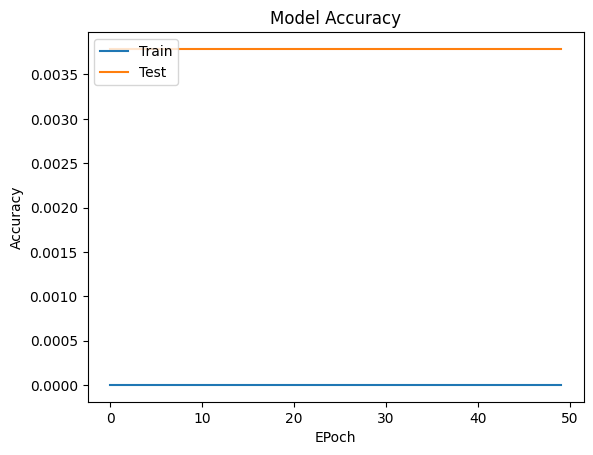

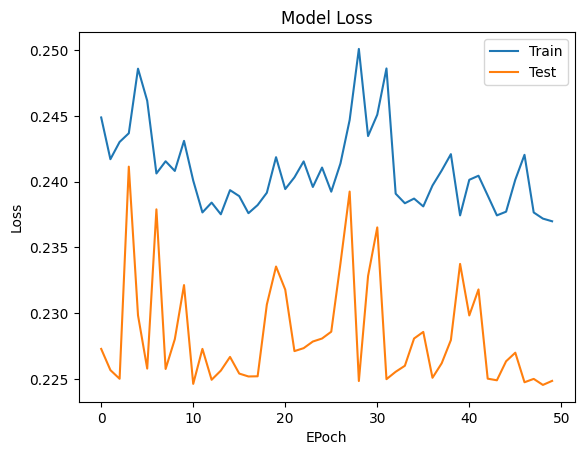

In [106]:
print (model.history.keys())
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('EPoch')
plt.legend (['Train', 'Test'], loc='upper left')
plt.show()
print('\n','\n','\n','\n')
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('EPoch')
plt.legend (['Train', 'Test'], loc='upper right')
plt.show()

###***Observation:***
####Accuracy increases and loss decreases in the testing part.

In [113]:
Y_pred=classifier.predict(X_test)
mae4=metrics.mean_absolute_error(Y_test,Y_pred)
mse4=metrics.mean_squared_error(Y_test,Y_pred)

7/7 [==============================] - 0s 5ms/step


In [114]:
print("MAE is: {:.2f}".format(mae4))
print("MSE is: {:.2f}".format(mse4))

MAE is: 0.23
MSE is: 0.11


In [115]:
print(Y_test)

492    0.006518
383    0.123560
856    0.249262
834    0.047047
603    0.564100
         ...   
72     1.000000
400    0.387409
813    0.055125
195    0.020682
45     0.065972
Name: Revenue, Length: 200, dtype: float64


In [117]:
rsme=sqrt(mse4)
print("RSME is {:.2f}".format(rsme))

RSME is 0.33
